In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,011 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126111 files and dire

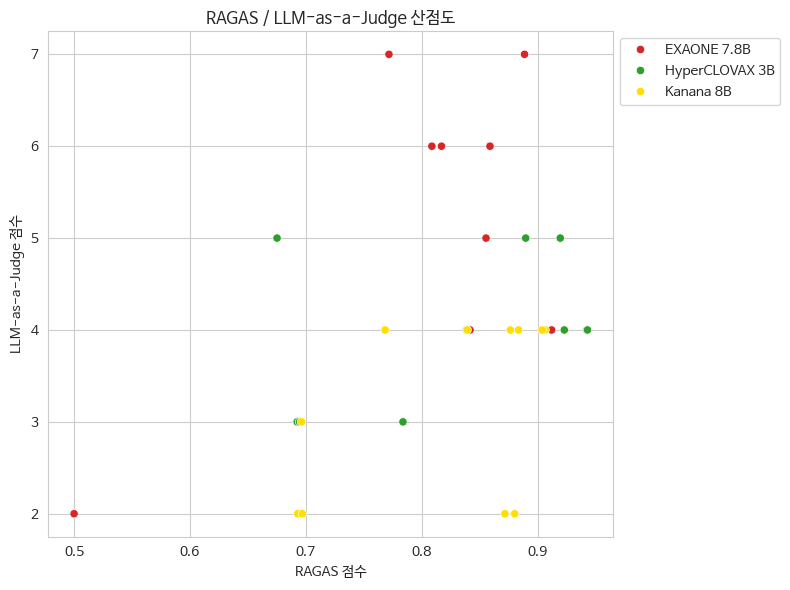

In [8]:
import pandas as pd

# 파일 불러오기
file_path = "/content/drive/MyDrive/KLH/data/ragas_result_with_score.csv"
df = pd.read_csv(file_path)

# 컬럼명 정리
df = df.rename(columns={
    'llm-as-a-judge\n(max scroe : 7)': 'llm_as_a_judge',
    'ragas': 'ragas_score',
    'model' : 'llm_model'
})

# 소수점 자릿수 정규화
df['ragas_score'] = pd.to_numeric(df['ragas_score'], errors='coerce').round(4)
df['llm_as_a_judge'] = pd.to_numeric(df['llm_as_a_judge'], errors='coerce').round(2)

# 시각화 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

# 격자 적용
sns.set_style("whitegrid")

# 한글 폰트 적용
plt.rc('font', family='NanumBarunGothic')

# 색상지정
palette = {
    "EXAONE 7.8B": "#d62728",
    "HyperCLOVAX 3B": "#2ca02c",
    "Kanana 8B": "#ffdf00"
}

# 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='ragas_score', y='llm_as_a_judge', hue='llm_model', palette=palette)
plt.title("RAGAS / LLM-as-a-Judge 산점도")
plt.xlabel("RAGAS 점수")
plt.ylabel("LLM-as-a-Judge 점수")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

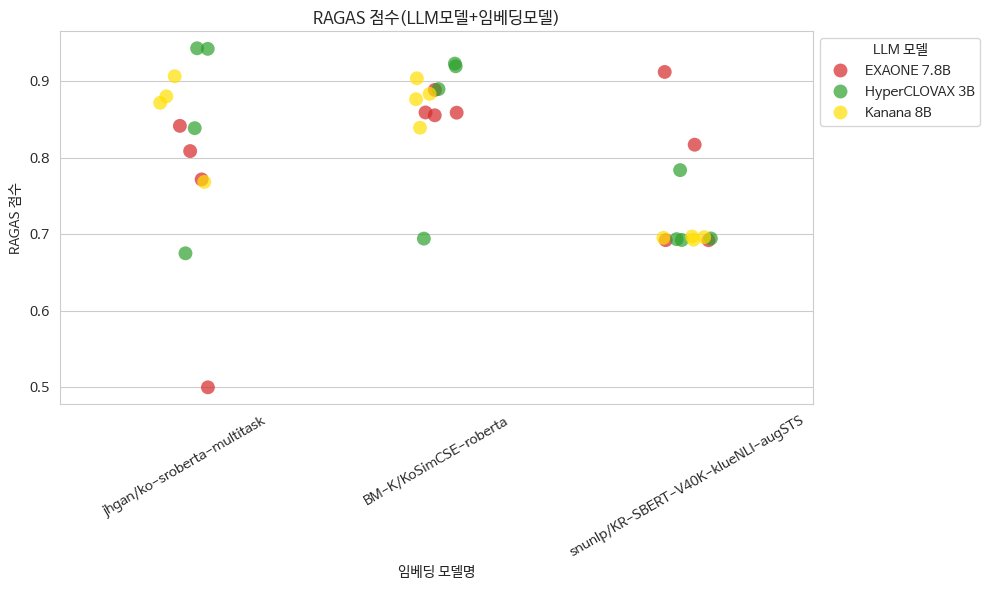

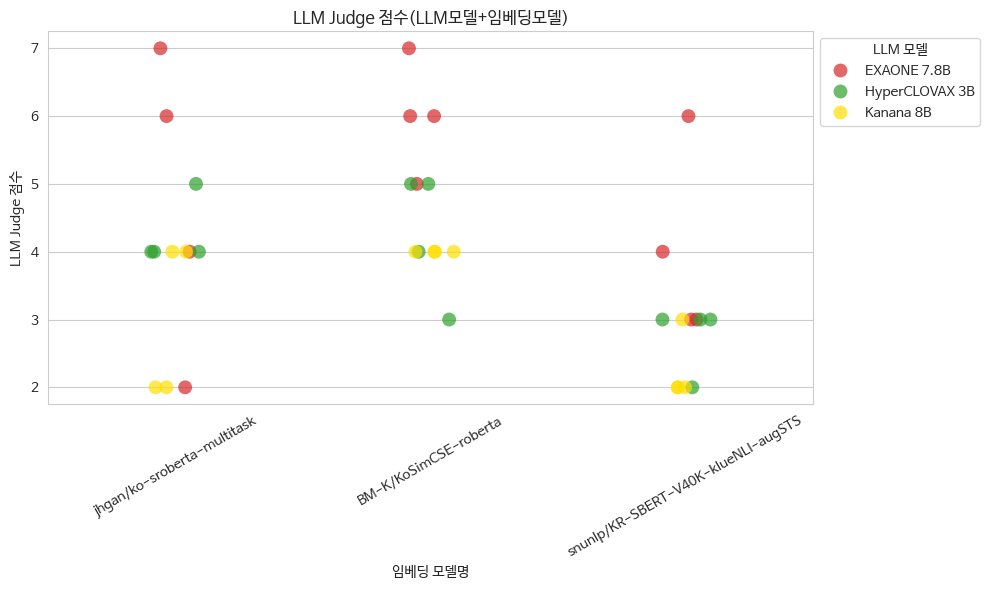

In [14]:
# RAGAS 기준 산점도(X: 임베딩, Y: RAGAS 점수)
plt.figure(figsize=(10, 6))
sns.stripplot(
    data=df,
    x='emb-model',
    y='ragas_score',
    hue='llm_model',
    palette=palette,
    jitter=True,
    size=10,
    alpha=0.7
)
plt.title("RAGAS 점수(LLM모델+임베딩모델)")
plt.xlabel("임베딩 모델명")
plt.ylabel("RAGAS 점수")
plt.xticks(rotation=30)
plt.legend(title='LLM 모델', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

# LLM Judge 기준 산점도(X: 임베딩, Y: LLM Judge 점수)
plt.figure(figsize=(10, 6))
sns.stripplot(
    data=df,
    x='emb-model',
    y='llm_as_a_judge',
    hue='llm_model',
    palette=palette,
    jitter=True,
    size=10,
    alpha=0.7
)
plt.title("LLM Judge 점수(LLM모델+임베딩모델)")
plt.xlabel("임베딩 모델명")
plt.ylabel("LLM Judge 점수")
plt.xticks(rotation=30)
plt.legend(title='LLM 모델', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()